In [4]:
from keras import models
from keras import layers
from keras.layers import Dense, Conv2D, Flatten
import pandas as pd
import numpy as np


Using TensorFlow backend.


## Read Data 

Read the train and test data 

In [5]:
Train = pd.read_csv("train_digits.csv")
Test = pd.read_csv("test_digits.csv")

In [6]:
print(Train.shape)

(42000, 785)


In [7]:
Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Read the labels into a seprate array
y_train = Train['label'].values

#convert the images into a matrix of size 42,000 X 28 X 28 
train_images = Train.loc[:,Train.columns != 'label'].values
train_images = train_images.reshape(42000,28,28,1)
train_images.shape


(42000, 28, 28, 1)

In [9]:

#convert the images into a matrix of size 28,000 X 28 X 28 
test_images = Test.values
test_images_final = test_images.reshape(28000,28,28,1)
test_images_final.shape


(28000, 28, 28, 1)

## Displaying an Example of a digit

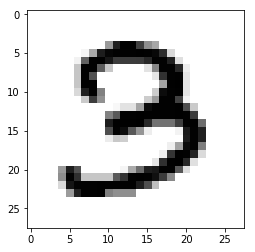

In [10]:
import matplotlib.pyplot as plt
digit = (train_images[14].reshape(28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

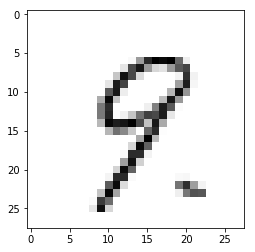

In [11]:
import matplotlib.pyplot as plt
digit = (test_images[2].reshape(28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Preparing the image data

In [12]:
#reshape data to fit model
#X_train = X_train.reshape(42000,28,28,1)
train_images = train_images.astype('float32') / 255
#test_images_final = X_test.reshape(28000,28,28,1)
test_images_final = test_images_final.astype('float32') / 255

## The network architecture

In [13]:
#network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dense(512, activation='relu'))
#network.add(layers.Dense(10, activation='softmax'))


#create model
network = models.Sequential()
#add model layers
network.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
network.add(Conv2D(32, kernel_size=3, activation='relu'))
network.add(Flatten())
network.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


## The compilation step

In [14]:
from keras import optimizers
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

## Spliting the Train data 

In [15]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, y_train, test_size=0.33)

## Preparing the labels

In [16]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


## Fit the Network

In [17]:
history = network.fit(X_train, train_labels, epochs=6, batch_size=128,validation_data=(X_test,test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 28140 samples, validate on 13860 samples
Epoch 1/6
28140/28140 [==============================] - 32s 1ms/step - loss: 0.2767 - acc: 0.9171 - val_loss: 0.1151 - val_acc: 0.9637
Epoch 2/6
28140/28140 [==============================] - 31s 1ms/step - loss: 0.0772 - acc: 0.9771 - val_loss: 0.0719 - val_acc: 0.9786
Epoch 3/6
28140/28140 [==============================] - 31s 1ms/step - loss: 0.0519 - acc: 0.9848 - val_loss: 0.0627 - val_acc: 0.9818
Epoch 4/6
28140/28140 [==============================] - 31s 1ms/step - loss: 0.0375 - acc: 0.9890 - val_loss: 0.0623 - val_acc: 0.9812
Epoch 5/6
28140/28140 [==============================] - 31s 1ms/step - loss: 0.0282 - acc: 0.9913 - val_loss: 0.0635 - val_acc: 0.9820
Epoch 6/6
28140/28140 [==============================] - 31s 1ms/step - loss: 0.0212 - acc: 0.9936 - val_loss: 0.0715 - val_acc: 0.9801


## Model Performances 

In [18]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
print('test_acc:', test_acc)

13860/13860 [==============================] - 5s 341us/step
test_acc: 0.9800865800865801


In [19]:
#Make Prediction
predict = network.predict(test_images_final)
#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in predict]

## Plotting the training and validation loss

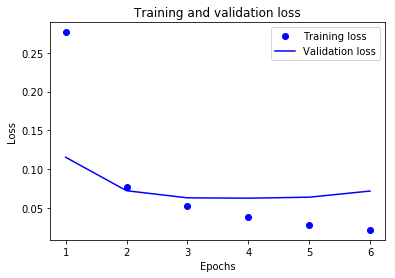

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1,len(history_dict['loss'])+1)
#epochs = range(1, 36)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
x = list(range(1, 28001))
df = pd.DataFrame({'ImageId' :x,'Label':y_classes})
df.to_csv("digitcnn1.csv",index=False)


## Example of Real Image

(28, 28)


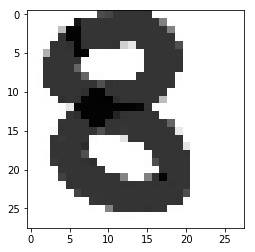

In [44]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
gray = cv2.imread('digit8.jpg')
gray = cv2.resize(gray,(28,28))
gray = cv2.cvtColor(gray, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
print(gray.shape)

In [45]:
train_image = gray.reshape((1,28,28,1))
train_image = train_image.astype('float32') / 255

In [47]:
predict1 = network.predict(train_image)
#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in predict1]
y_classes
predict1



array([[1.2507257e-06, 1.4008762e-04, 4.6923227e-04, 9.9937731e-01,
        1.2486283e-06, 1.4130479e-09, 6.9303933e-06, 2.0711525e-06,
        2.0223256e-06, 1.9474320e-09]], dtype=float32)